In [2]:
from google.colab import files


uploaded = files.upload()


Saving database.sqlite to database.sqlite
Saving Iris.csv to Iris.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [11]:
iris = pd.read_csv("Iris.csv")

In [9]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


removing unneccesary columns

In [12]:
iris.drop('Id', axis=1, inplace=True)

some EDA

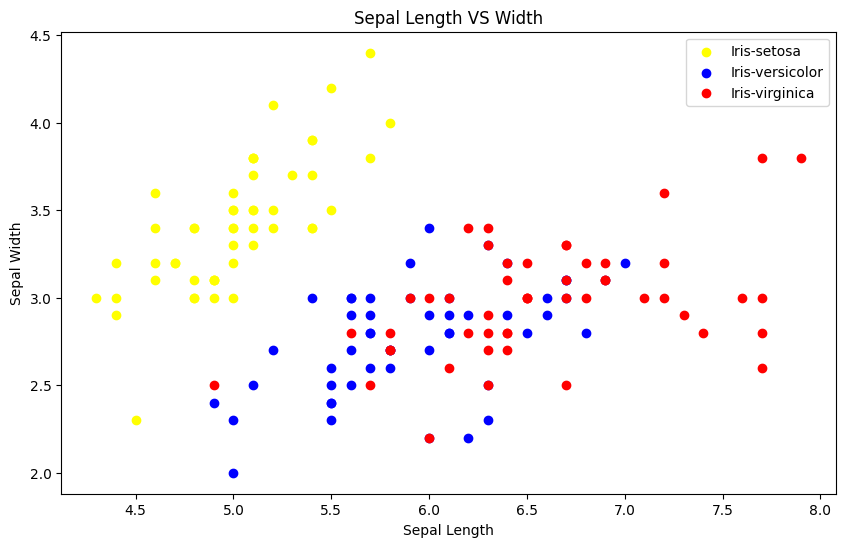

In [14]:
# Define colors for each species
colors = {'Iris-setosa': 'yellow', 'Iris-versicolor': 'blue', 'Iris-virginica': 'red'}

# Create a scatter plot for Sepal Length vs. Sepal Width
fig, ax = plt.subplots()
for species, color in colors.items():
    subset = iris[iris.Species == species]
    ax.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], color=color, label=species)

# Set labels and title
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Sepal Length VS Width")

# Set the figure size
fig.set_size_inches(10, 6)

# Show legend
ax.legend()

# Display the plot
plt.show()


The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

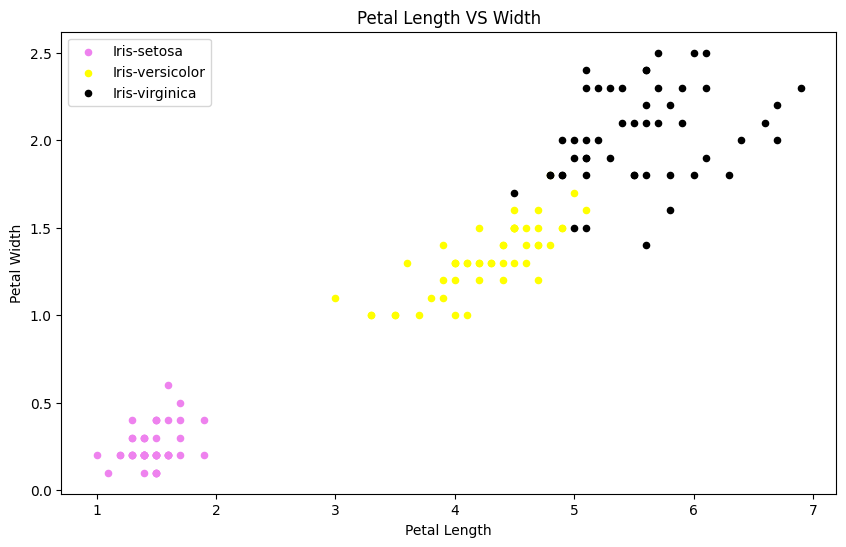

In [15]:
# Define colors for each species
colors = {'Iris-setosa': 'violet', 'Iris-versicolor': 'yellow', 'Iris-virginica': 'black'}

# Create a scatter plot for Petal Length vs. Petal Width
fig, ax = plt.subplots()
for species, color in colors.items():
    subset = iris[iris.Species == species]
    subset.plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color=color, label=species, ax=ax)

# Set labels and title
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length VS Width")

# Set the figure size
fig.set_size_inches(10, 6)

# Show legend
ax.legend()

# Display the plot
plt.show()


As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

Now let us see how are the length and width are distributed

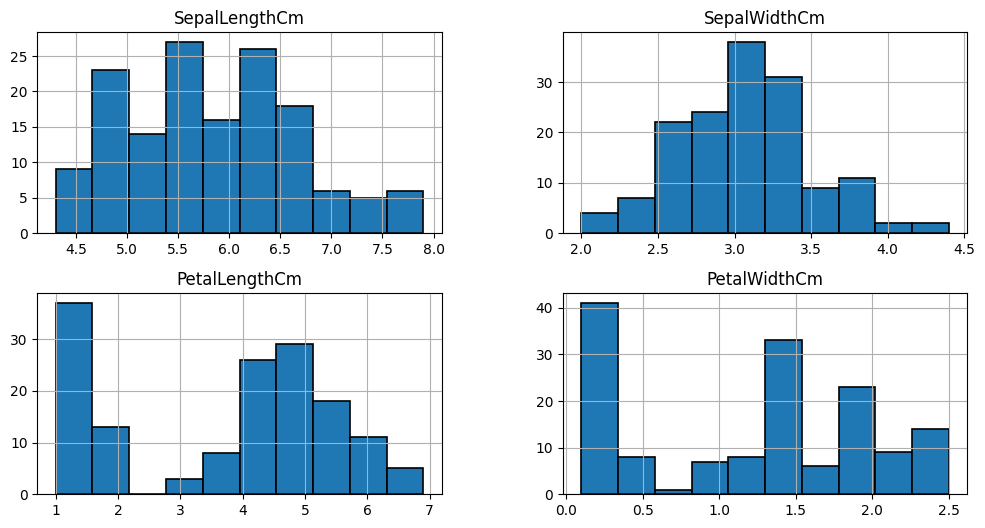

In [16]:
# Plot histograms for each feature in the Iris dataset
iris.hist(edgecolor='black', linewidth=1.2, figsize=(12, 6))

# Show the plot
plt.show()


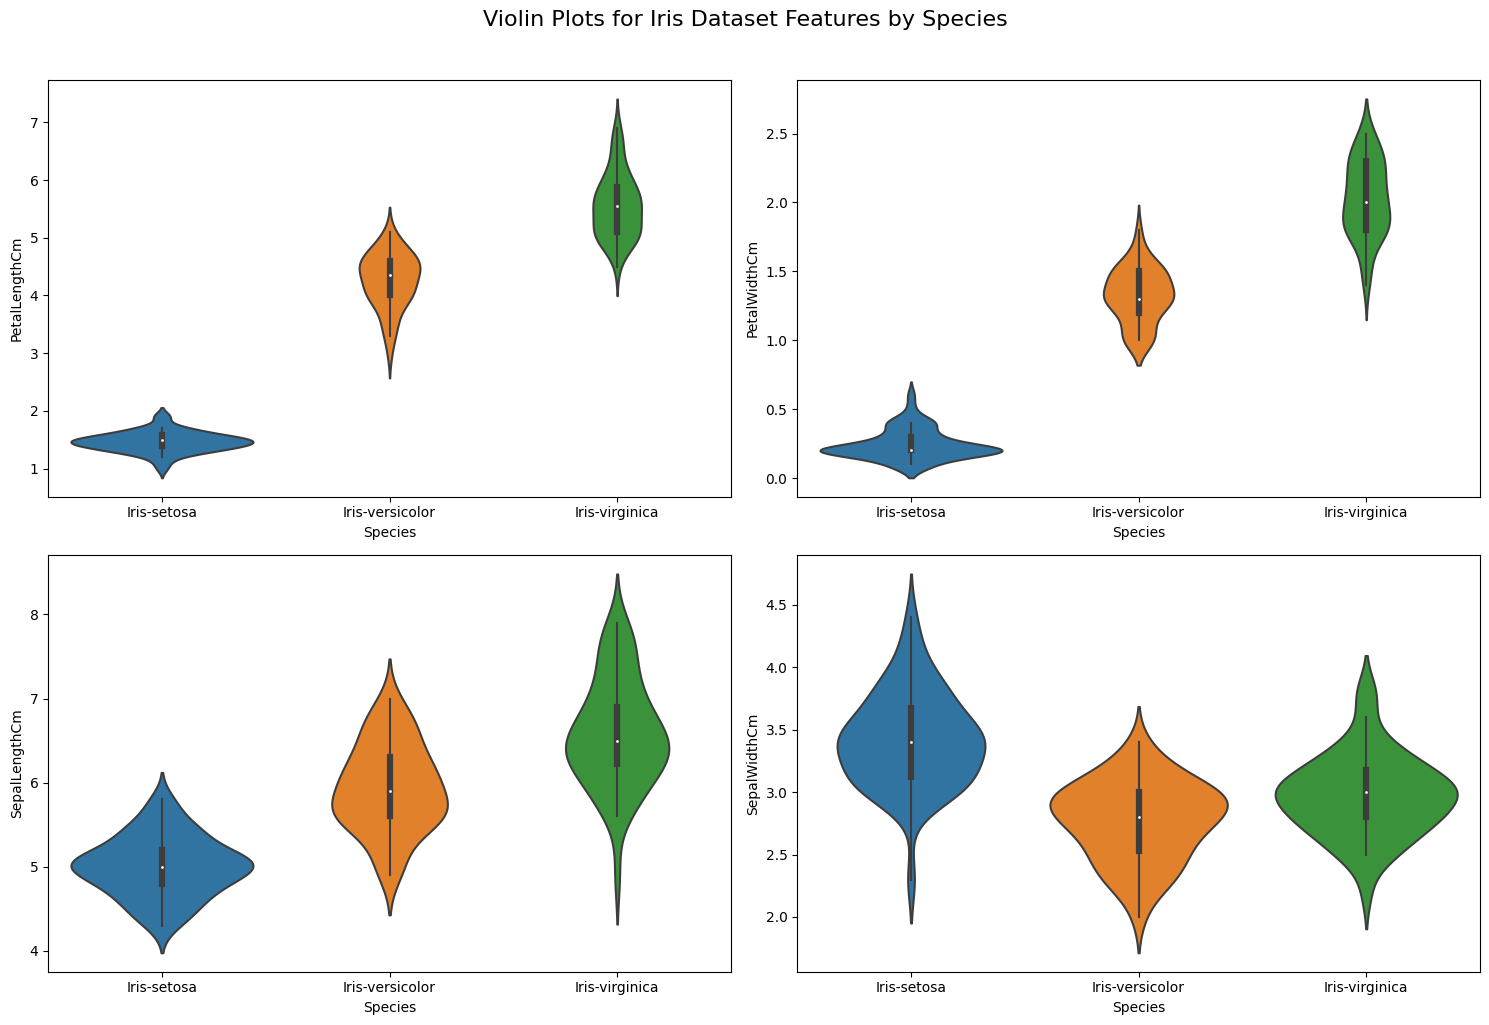

In [17]:
# Set the overall figure size
plt.figure(figsize=(15, 10))

# Define the subplots using a loop
for i, feature in enumerate(['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Species', y=feature, data=iris)

# Add a title to the overall figure
plt.suptitle("Violin Plots for Iris Dataset Features by Species", y=1.02, fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


The violin plot visually represents the distribution of length and width across different species. The width of the plot indicates the density, with thinner parts indicating lower density and fatter parts suggesting higher density.

Moving on to the nature of the problem, it's a classification problem. In classification, the goal is to assign samples to two or more classes based on patterns learned from labeled data. Essentially, it's about predicting the class of unlabeled data.

In contrast, regression comes into play when the desired output involves one or more continuous variables. For instance, predicting the length of a salmon based on its age and weight exemplifies a regression problem.








attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [20]:
iris.shape #get the shape of the dataset

(150, 5)

Heat Map

<ipython-input-21-75c10d863ee4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')


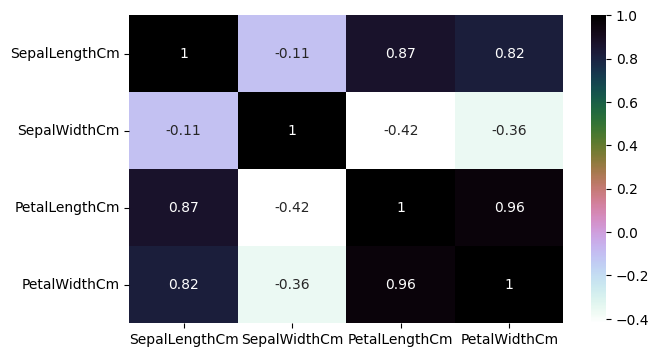

In [21]:
# Set the figure size
plt.figure(figsize=(7, 4))

# Draw a heatmap with correlation matrix and annotations
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')

# Display the plot
plt.show()


The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy.

split the data into train and test set

In [22]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [25]:
# Features and output values for training data
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train['Species']

# Features and output values for test data
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test['Species']


Lets check the Train and Test Dataset

In [26]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,4.4,3.0,1.3,0.2
117,7.7,3.8,6.7,2.2


In [27]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,5.1,3.8,1.5,0.3
15,5.7,4.4,1.5,0.4


output of the traininig data

In [28]:
train_y.head()

38         Iris-setosa
117     Iris-virginica
64     Iris-versicolor
43         Iris-setosa
70     Iris-versicolor
Name: Species, dtype: object

decision tree

In [29]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(train_X, train_y)

# Make predictions on the test data
predictions = model.predict(test_X)

# Evaluate and print the accuracy
accuracy = metrics.accuracy_score(predictions, test_y)
print(f'The accuracy of the Decision Tree is: {accuracy:.2%}')


The accuracy of the Decision Tree is: 91.11%


k-nearest neighbours

In [30]:
# Create a K-Nearest Neighbors (KNN) model with 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(train_X, train_y)

# Make predictions on the test data
predictions = model.predict(test_X)

# Evaluate and print the accuracy
accuracy = metrics.accuracy_score(predictions, test_y)
print(f'The accuracy of the KNN is: {accuracy:.2%}')


The accuracy of the KNN is: 93.33%


checking accuracy for knn

<ipython-input-31-a4680db85056>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series(index=range(1, 11))


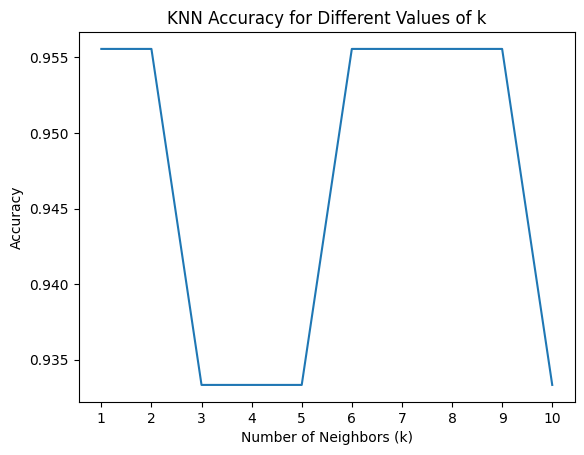

In [31]:
# Create a series to store accuracy values
a = pd.Series(index=range(1, 11))

# Iterate over different values of k
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a[i] = metrics.accuracy_score(prediction, test_y)

# Plot the accuracy values
plt.plot(a.index, a)
plt.xticks(range(1, 11))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.show()


Creating Petals And Sepals Training Data

In [32]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [33]:
# Splitting for Petals
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_x_p, train_y_p = train_p[['PetalWidthCm', 'PetalLengthCm']], train_p['Species']
test_x_p, test_y_p = test_p[['PetalWidthCm', 'PetalLengthCm']], test_p['Species']

# Splitting for Sepals
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s, train_y_s = train_s[['SepalWidthCm', 'SepalLengthCm']], train_s['Species']
test_x_s, test_y_s = test_s[['SepalWidthCm', 'SepalLengthCm']], test_s['Species']


decision tree

In [34]:
# Decision Tree model for Petals
model_p = DecisionTreeClassifier()
model_p.fit(train_x_p, train_y_p)
prediction_p = model_p.predict(test_x_p)
accuracy_p = metrics.accuracy_score(prediction_p, test_y_p)
print(f'The accuracy of the Decision Tree using Petals is: {accuracy_p:.2%}')

# Decision Tree model for Sepals
model_s = DecisionTreeClassifier()
model_s.fit(train_x_s, train_y_s)
prediction_s = model_s.predict(test_x_s)
accuracy_s = metrics.accuracy_score(prediction_s, test_y_s)
print(f'The accuracy of the Decision Tree using Sepals is: {accuracy_s:.2%}')

The accuracy of the Decision Tree using Petals is: 95.56%
The accuracy of the Decision Tree using Sepals is: 66.67%


k- nearest neighbours

In [35]:
# K-Nearest Neighbors (KNN) model for Petals
model_p = KNeighborsClassifier(n_neighbors=3)
model_p.fit(train_x_p, train_y_p)
prediction_p = model_p.predict(test_x_p)
accuracy_p = metrics.accuracy_score(prediction_p, test_y_p)
print(f'The accuracy of KNN using Petals is: {accuracy_p:.2%}')

# K-Nearest Neighbors (KNN) model for Sepals
model_s = KNeighborsClassifier(n_neighbors=3)
model_s.fit(train_x_s, train_y_s)
prediction_s = model_s.predict(test_x_s)
accuracy_s = metrics.accuracy_score(prediction_s, test_y_s)
print(f'The accuracy of KNN using Sepals is: {accuracy_s:.2%}')


The accuracy of KNN using Petals is: 97.78%
The accuracy of KNN using Sepals is: 73.33%
